# Oscillatory Motion and Chaos

Let start with the simple pendulum, a particle of $m$ connected by a massless string to a rigid support. Let $\theta$ be the angle that the string makes with the vertical. So we can write Newton's second law 

$$F_{\theta} = - m g sin(\theta) $$

Where g is the acceleration fo gravity. If $s$ denotes the position along the trajectory arc of the mass, then $s=l\theta$ where $l$ is the length of the string. For small angle, $sin(\theta) \approx \theta$ and we can rewrite this equation as: 

$$ \frac{d^2\theta}{dt^2} = - \frac{g}{l} \theta $$

This is a second order differential equation and the solution is 

$$ \theta = \theta_0 sin(\Omega t + \phi) $$

where $\omega = \sqrt{g/l} $ and $\Omega$ and $\theta_0$ are constants.

Lets consider a numerical solution to this problem. We write two first order differential equations and use the Euler method.

$$ \frac{d\omega}{dt} = \frac{g}{l} \theta $$

$$ \frac{d\theta}{dt} = \omega $$

The Euler version of this is:

$$\omega_{i+1} = \omega_i - \frac{g}{l}\theta_i \Delta t $$

$$\theta_{i+1} = \theta_i + w_i \Delta t $$

Let's implement this solution

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def pendulum_traj(theta0, w0, l,dt, tmax):
    g = 9.8
    N = int(tmax/dt)
    theta = np.zeros(N)
    w = np.zeros(N)
    t = np.zeros(N)
    
    theta[0] = theta0
    w[0] = w0
    
    for i in range(N-1):
        w[i+1] = w[i] - g/l*theta[i] * dt
        theta[i+1] = theta[i] + w[i]*dt
        t[i+1] = t[i] + dt
    
    return t, theta, w

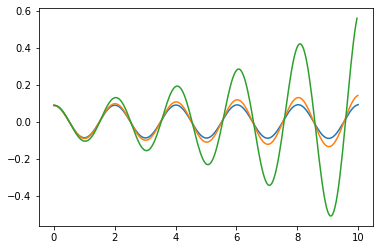

In [4]:
theta0 = 5*np.pi/180
l = 1
t, th, w = pendulum_traj(theta0, 0, l, 0.001, 10)
plt.plot(t,th)
t, th, w = pendulum_traj(theta0, 0, l, 0.01, 10)
plt.plot(t,th)
t, th, w = pendulum_traj(theta0, 0, l, 0.04, 10)
plt.plot(t,th)

### Exercise 1
Use the previous function to produce results for different values of $\Delta t$, try, 0.01, 0.1, 0.2. Discuss your results, is that what you expect to get?

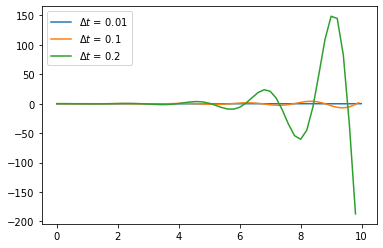

In [5]:
l = 1
theta0 = 5*np.pi/180

t, th, w = pendulum_traj(theta0, 0, l, 0.01, 10)
plt.plot(t,th, label="$\Delta t$ = 0.01")
t, th, w = pendulum_traj(theta0, 0, l, 0.1, 10)
plt.plot(t,th, label="$\Delta t$ = 0.1")
t, th, w = pendulum_traj(theta0, 0, l, 0.2, 10)
plt.plot(t,th, label="$\Delta t$ = 0.2")

plt.legend(loc='upper left')

This makes sense. As we increase the $\Delta t$, the amount of "frames" we have to look at decrease and so our answers will become less accuracte as time goes on. We can see at the end of the $\Delta t$ = 0.2 graph, it gets very choppy and that is because our value has gotten to large to make a nice graph. However, the movement that it plots is correct, just not very accurate.


## Euler-Cromer Method

Let's see what happens to the energy. The energy of the oscillator is kinetic + potential and should be conserved.

$$ E = \frac{1}{2} m l^2 \omega^2 + mgl(1-cos(\theta) $$

The first term is just the kinetic energy $1/2 m v^2$ and $ v = l\omega $ and the second term is just $mgh$ and $h=l(1-cos(\theta)$ Using our dicrete values the energy as a function of time will be:

$$E_{i+1} = E_i  + \frac{1}{2}mgl(\omega_i^2+\frac{g}{l}\theta_i^2)(\Delta t)^2 $$

As you can see the energy is always increasing. Euler method does not conserve energy, the error is not that big for projectile motion but in some problem where you need a solution over a longer range, the method just fails.

A simple modification is given by the Euler-Cromer method.

For each time step
* $w_{i+1} = w_i - \frac{g}{l} \theta_i \Delta_t $
* $\theta_{i+1} = \theta_i + w_{i+1}\Delta_t $ *Compare this line with Euler*
* $t_{i+1} = t_i + \Delta t$
* Repeat

### Exercise 2 ###

Implement a function pendulum_traj_euler_cromer similar to the previous one using the Euler Cromer method. Solve for the same initial condition and values of $\Delta t$ as before.



In [6]:
def pendulum_traj_ec(theta0, w0, l, dt, tmax):
    g = 9.8
    N = int(tmax/dt)
    theta = np.zeros(N)
    w = np.zeros(N)
    t = np.zeros(N)
    
    theta[0] = theta0
    w[0] = w0
    
    for i in range(N-1):
        w[i+1] = w[i] - (g/l) * theta[i] * dt
        theta[i+1] = theta[i] + w[i+1]*dt
        t[i+1] = t[i] + dt
    
    return t, theta, w

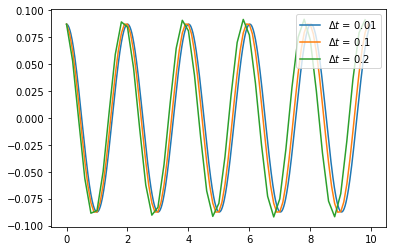

In [7]:
l = 1
theta0 = 5*np.pi/180

t, th, w = pendulum_traj_ec(theta0, 0, l, 0.01, 10)
plt.plot(t,th, label="$\Delta t$ = 0.01")
t, th, w = pendulum_traj_ec(theta0, 0, l, 0.1, 10)
plt.plot(t,th, label="$\Delta t$ = 0.1")
t, th, w = pendulum_traj_ec(theta0, 0, l, 0.2, 10)
plt.plot(t,th, label="$\Delta t$ = 0.2")

plt.legend(loc='upper right')

We can see that there is the Oscillatory motion, but it appears to not infinitely gain energy and will only oscillate by the given initial conditions.

## Leap frog method ##
Lets solve the pendulum problem using the leapfrog method. At the end of this notebook there is a derivation of the method.
If you have a differential equation you need to solve

$$
\frac{dy(t)}{dt}=f(y(t),t) \tag{A1}
$$

Using the central difference approcimation, you can get the following formula

$$
y_{i+1} 
=y_{i-1}+\int_{{{t}_{i-1}}}^{t_{i+1}}{}\,d{t}'\,f(y({t}'),{t}')
\simeq y_{i-1}+2\Delta t \,f_i \tag{A12}
$$

or
$$
y_{i+1} \simeq y_{i-1}+2\Delta t \,f_i
$$

### Exersice 3 ###
Solve the pendulum using the leapfrog algorithm, you will need to write a new function pendulum_traj_leapfrog. Notice, when implementing the algorithm, you will need $y_0$ and $y_1$ before you start the loop. $y_0$ comes from the initial condition and $y_{1}$ can be obtained using Euler.
Plot a few trajectories for same initial condition and  a few $\Delta t$



In [8]:
def pendulum_traj_leapfrog(theta0, w0, l, dt, tmax, y0):
    g = 9.8
    N = int(tmax/dt)
    theta = np.zeros(N)
    w = np.zeros(N)
    t = np.zeros(N)
    y = np.zeros(N)
    
    theta[0] = theta0
    w[0] = w0
    y[0] = y0
    y[1] = y[0] + (2 * dt * w[0])
    
    for i in range(N-1):
        y[i+1] = y[i-1] + (2 * dt * w[i])
        w[i+1] = w[i] - (g/l) * theta[i] * dt
        theta[i+1] = theta[i] + w[i+1]*dt
        t[i+1] = t[i] + dt
    
    return y, t

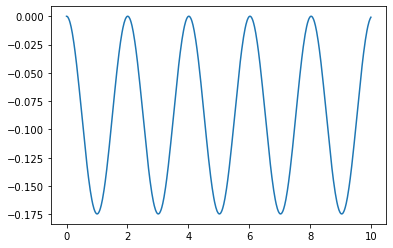

In [9]:
l = 1
theta0 = 5*np.pi/180

height, time = pendulum_traj_leapfrog(theta0, 0, l, 0.01, 10, 0)
plt.plot(time,height)


## $2^{nd}$ Order Runge Kutta ##
Another approximation would use the values at the middle fo the time interval, however we don't know the values at this time so we have to use a rough approximation. The appendix at the end of the notebook has a derivation for this values.

Here is the new algorithm
* Use values of $\omega$ and $a$ (acceleration) a the beginning of the interval to estimate the angle $\theta_{mid}$ and velocity $\omega_{mid}$ at the middle of the time interval.
* Use the estimated $\theta_{mid}$ and velocity $\omega_{mid}$ at the middle to calculate and estimated acceleration $a_{mid}$ at the middle of the interval
* Use the estimated $w_{mid}$ and $a_{mid}$ at the middle of the interval to calculate the changes in $\theta$ and $\omega$ over the whole interval

This procedure is called the *Euler-Richardson algorithm* also known as *second-order Runge-Kutta algorithm*. An implementation using equations would go as follows.

For each time step $\{t, t+\Delta t\}$
* $a(t) = -\frac{g}{l} \theta(t)$
* $\theta(t+\frac{1}{2}\Delta t) = \theta(t) + w(t)\frac{1}{2}\Delta t$
* $w(t+\frac{1}{2}\Delta t) = w(t) + a(t) \frac{1}{2} \Delta t $
* $a(t+\frac{1}{2}) = -\frac{g}{l} \theta(t+\frac{1}{2} \Delta t)$
* $\theta(t+\Delta t) = \theta(t) + w(t+\frac{1}{2}\Delta t) \Delta t$
* $w(t+\Delta t) = w(t) + a(t+\frac{1}{2} \Delta t)\Delta t$
* $t_{i+1} = t_i + \Delta t$
* Repeat

Or in seudo code:

For each time step
* $a = -\frac{g}{l} \theta_i$
* $\theta_{mid} = \theta_i + w_i \frac{1}{2} \Delta t$
* $w_{mid} = w_i + a \frac{1}{2} \Delta t$
* $a_{mid} = -\frac{g}{l} \theta_{mid}$
* $\theta_{i+1} = \theta_i + w_{mid} \Delta t$
* $w_{i+1} = w_i + a_{mid} \Delta t$
* $t_{i+1} = t_i + \Delta t$
* Repeat

### Exercise 4 ###
Implement a function pendulum_traj_2nd_order_RK that implements this algorithm and plot the trajectories from the same initial condition in the first example with a few $\Delta t$

In [10]:
def pendulum_traj_2nd_RK(theta0, w0, l,dt, tmax):
    g = 9.8
    N = int(tmax/dt)
    theta = np.zeros(N)
    w = np.zeros(N)
    t = np.zeros(N)
    
    theta[0] = theta0
    w[0] = w0
    
    for i in range(N-1):
        a = (-g / l) * theta[i]
        
        thetaM = theta[i] + (w[i] * 0.5 * dt)
        wM = w[i] + (a * 0.5 * dt)
        aM = (-g / l) * thetaM
        
        theta[i+1] = theta[i] + (wM * dt)
        w[i+1] = w[i] + (aM * dt)
        t[i+1] = t[i] + dt
        
    return t, theta, w

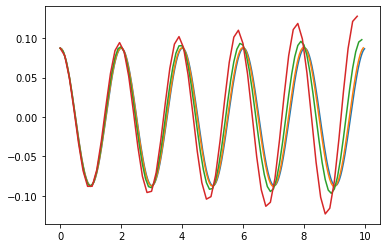

In [11]:
l = 1
theta0 = 5*np.pi/180

t, th, w = pendulum_traj_2nd_RK(theta0, 0, l, 0.01, 10)
plt.plot(t,th, label="$\Delta t$ = 0.01")
t, th, w  = pendulum_traj_2nd_RK(theta0, 0, l, 0.05, 10)
plt.plot(t,th, label="$\Delta t$ = 0.05")
t, th, w  = pendulum_traj_2nd_RK(theta0, 0, l, 0.1, 10)
plt.plot(t,th, label="$\Delta t$ = 0.1")
t, th, w  = pendulum_traj_2nd_RK(theta0, 0, l, 0.15, 10)
plt.plot(t,th, label="$\Delta t$ = 0.15")

We can see that for small values of $\Delta t$, we get something that should accurately model the oscillations. If our $\Delta t$ gets too large, like with a $\Delta t$ of 0.15, it will gain energy and will model the motion very poorly.

## Energy analysis.
In the next 2 excercises we will analyse the energy of the solutions produce by the different methods

### Exercise 5
Work out a formula for the total energy (kinetic plus gravitational) of the pendulum in term of $\theta$ and $\omega$ and constants. Take the gravitational potential energy to be zero at the lowest point of the pendulum swing. Write your equation below using Markdown and Latex

$$ E = Kinetic\space Energy + Potential\space Energy $$
$$ Kinetic\space Energy = \frac{1}{2} m v^2 \space ,\space Potential\space Energy = mgh $$
$$ Kinetic\space Energy = \frac{1}{2} m l^2\omega^2 \space ,\space Potential\space Energy = mgl(1-cos(\theta)) $$

$$ E = \frac{1}{2} m l^2 \omega^2 + mgl(1-cos(\theta)) $$

### Exercise 6
Write a function to calculate the energy using the trajectories produced by any of the previous functions. Plot the total energy for at least 10 perios for trajectories produced by Euler, Euler-Cromer, Leapfrog and Runge Kutta

In [12]:
def pendulum_energy(theta0, w0, l, dt, tmax):
    g = 9.8
    m = 5
    t, th, w = pendulum_traj(theta0, w0, l, dt, tmax)
    Eeuler = (0.5 * m * l**2 * w**2) + (m * g * l)*(1 - np.cos(th))
    plt.plot(t, Eeuler, label = "Euler Method Energy")
    t, th, w = pendulum_traj_ec(theta0, w0, l, dt, tmax)
    Eec = (0.5 * m * l**2 * w**2) + (m * g * l)*(1 - np.cos(th))
    plt.plot(t, Eec, label = "Euler-Cromer Method Energy")
    t, th, w = pendulum_traj_2nd_RK(theta0, w0, l, dt, tmax)
    Erk = (0.5 * m * l**2 * w**2) + (m * g * l)*(1 - np.cos(th))
    plt.plot(t, Erk, label = "Runge Kutta Energy")
    plt.legend(loc = 'upper left')

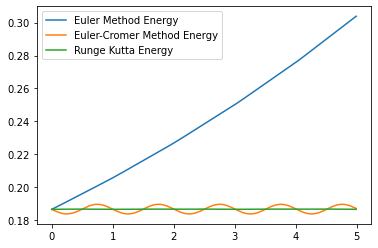

In [13]:
l = 1
theta0 = 5*np.pi/180
pendulum_energy(theta0, 0, l, 0.01, 5)

We can see with just the Euler method approximation, the energy of the system will exponentially increase to an infinite amount. With the Euler-Cromer method, we see the energy of the system will fluctuate between certain bounds, which we know isn't correct because the energy of the system should be the same across all time. However, once we plot the Runge Kotta Energy, we see that it stays the same across all time which gives us the best approximation for the energy of our system. It also provides us insight in that the average value of energy for our Euler-Cromer method plot should be the actual energy of the system, so while the plot itself is not correct due to the way the Euler-Cromer method is, we should still be able to make a good approximation of what the total energy of our system is.

## Pendulum with friction
Lets add dissipation, friction and a driving force to the pendulum

### Just friction
The differential equation becomes

$$ \frac{d^2\theta}{dt^2} = - \frac{g}{l}\theta - q \frac{d\theta}{dt} $$

$q$ is a paremeter tha measure the strength of the damping. This differential equation can be solved anallytically, the solution has the following form 

$$\theta(t) = \theta_0 e^{-qt/2}sin(\sqrt{\Omega^2-q^2/4}t+\phi)$$

### Exersice 7
Solve this differenctial equation using the Euler method and compare with the analitical result. Solve the equation for three values of $q$, q = 1.0, 5.0, 10.0. Discuss your results. Make sure you write a function that generates the trajectory.

In [14]:
def pendulum_traj_fric(theta0, w0, l, dt, tmax, q):
    g = 9.8
    N = int(tmax/dt)
    theta = np.zeros(N)
    w = np.zeros(N)
    t = np.zeros(N)
    
    theta[0] = theta0
    w[0] = w0
    
    for i in range(N-1):
        w[i+1] = w[i] - (((g/l*theta[i]) + (q*w[i]))*dt)
        theta[i+1] = theta[i] + w[i]*dt
        t[i+1] = t[i] + dt
    
    return t, theta, w

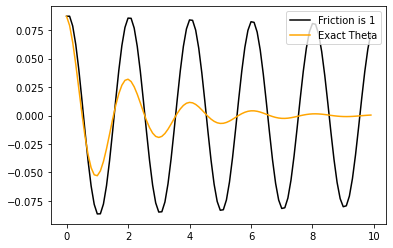

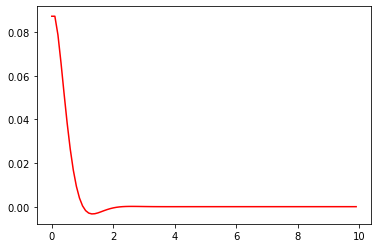

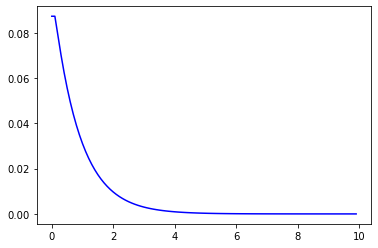

In [15]:
theta0 = 5*np.pi/180
l = 1
g = 9.8
omega = np.sqrt(g/l)

plt.figure(1)
q = 1
phi = np.pi/2

t, th, w = pendulum_traj_fric(theta0, 0, l, 0.1, 10, q)
sin_constant = np.sqrt((omega**2) - (q**2/4))*t + phi
plt.plot(t,th, label = "Friction is 1", color = 'black')

theta_exact = theta0 * np.exp((-q * t)/2) * np.sin(sin_constant)
plt.plot(t,theta_exact, label = "Exact Theta", color = 'orange')
plt.legend(loc='upper right')

plt.figure(2)
q = 5
phi = 0
sin_constant = np.sqrt((omega**2) - (q**2/4))*t + phi

t, th, w = pendulum_traj_fric(theta0, 0, l, 0.1, 10, q)
plt.plot(t,th, label = "Friction is 5", color = 'red')

plt.figure(3)
q = 10

t, th, w = pendulum_traj_fric(theta0, 0, l, 0.1, 10, q)
plt.plot(t,th, label = "Friction is 10", color = 'blue')

## Pendulum with friction and a driving force
Let's add a driving force to the pendulum
The differential equation now becomes

$$ \frac{d^2\theta}{dt^2} = - \frac{g}{l}\theta - q \frac{d\theta}{dt} + F_D sin(\Omega_D t) $$

$q$ is a paremeter tha measure the strength of the damping and $F_D sin(\Omega_D t)$ is the driving force. 
### Excersice 8 ###
Solve this differential equation using the Euler-Cromer method and plot the result for $\Omega_D$ = 2.0 $F_D$ = 0.2 and q = 1.0 and for $\Omega_D$ = 2/3 $F_D$ = 0.5 and q = 0.5 As usual write a function to generate the trajectory and plot the result. You should find that after an initial transitent behavior, the motion becomes periodic.

In [16]:
def pendulum_traj_ec_fric_driveF(theta0, w0, l, dt, tmax, omegad, Fd, q):
    g = 9.8
    N = int(tmax/dt)
    theta = np.zeros(N)
    w = np.zeros(N)
    t = np.zeros(N)
    
    theta[0] = theta0
    w[0] = w0
    
    for i in range(N-1):
        w[i+1] = w[i] + (((-g/l*theta[i]) - (q*w[i])) + (Fd*np.sin(omegad * t[i])))*dt
        theta[i+1] = theta[i] + w[i+1]*dt
        t[i+1] = t[i] + dt
    
    return t, theta, w

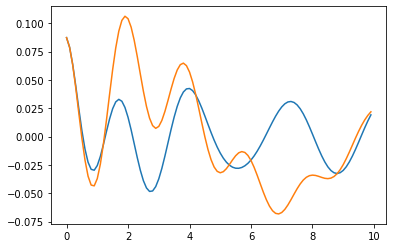

In [17]:
theta0 = 5*np.pi/180
l = 1

t, th, w = pendulum_traj_ec_fric_driveF(theta0, 0, l, 0.1, 10, 2, 0.2, 1)
plt.plot(t, th)
t, th, w = pendulum_traj_ec_fric_driveF(theta0, 0, l, 0.1, 10, (2/3), 0.5, 0.5)
plt.plot(t, th)


# Chaos ###
Let's study the chaotic motion in the pendulum with friction and driving force. For this we need to get rid of the approximation in the $sin(\theta)$. The equation now is:

$$ 
\frac{d^2\theta}{dt^2} = - \frac{g}{l}sin(\theta) - q \frac{d\theta}{dt} + F_D sin(\Omega_D t) 
$$

This a nonlinear differential equation.

### Exercise 9 ##
Modified the function from exercise 5 to solve this differential equation. and plot the result for $\Omega_D$ = 2.0 $F_D$ = 0.2 and q = 1.0 and $\theta_0$ = 0


In [18]:
def pendulum_traj_ec_chaos(theta0, w0, l, dt, tmax, omegad, Fd, q):
    g = 9.8
    N = int(tmax/dt)
    theta = np.zeros(N)
    w = np.zeros(N)
    t = np.zeros(N)
    
    theta[0] = theta0
    w[0] = w0
    
    for i in range(N-1):
        w[i+1] = w[i] + (((-g/l*np.sin(theta[i])) - (q*w[i])) + (Fd*np.sin(omegad * t[i])))*dt
        theta[i+1] = theta[i] + w[i+1]*dt
        t[i+1] = t[i] + dt
    
    return t, theta, w

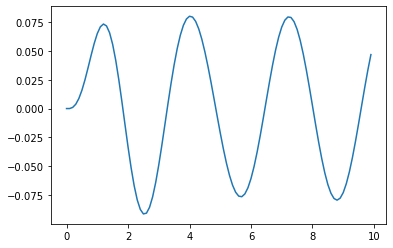

In [19]:
theta0 = 0
l = 1

t,th,w = pendulum_traj_ec_chaos(theta0, 0, l, 0.1, 10, 2, 0.5, 1)
plt.plot(t,th)

### Exercise 10
Plot the results for $\Omega_D$ = 2/3 $F_D$ = 0.5 and q = 0.5 and $\theta_0 = 0$. Now increase the drive amplitude to 1.2 and generate a new trajectory plot it. What do you observe?

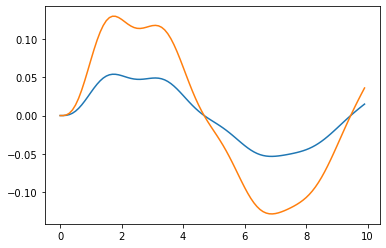

In [21]:
theta0 = 0
l = 1

t,th,w = pendulum_traj_ec_chaos(theta0, 0, l, 0.1, 10, (2/3), 0.5, 0.5)
plt.plot(t,th)
t,th,w = pendulum_traj_ec_chaos(theta0, 0, l, 0.1, 10, (2/3), 1.2, 0.5)
plt.plot(t,th)

When the drive amplitude is suffiently large, the pendulum can swing over the top of the pivot and the motion beomes much more complex, this is called chaos. The behavior is unpredictable as even a tiny change in the initial conditions resutls in an exponentially increasing change in the general motion. 
### Exercise 11 ###
For $\Omega_D$ = 2/3 $F_D$ = 0.5 and q = 0.5, generate trajectories with slighly different initial conditions and plot the results and compare the trajectories. You can generage one trajectory at $\theta_0 = 0$ and the other at $\theta_0 = 0.001$ 

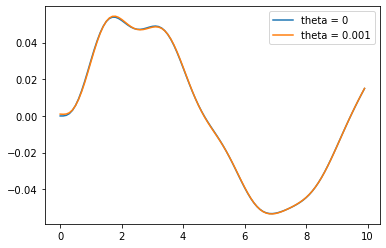

In [300]:
theta0 = 0
l = 1

t,th,w = pendulum_traj_ec_chaos(theta0, 0, l, 0.1, 10, (2/3), 0.5, 0.5)
plt.plot(t,th, label = 'theta = 0')
theta0 = 0.001
t,th,w = pendulum_traj_ec_chaos(theta0, 0, l, 0.1, 10, (2/3), 0.5, 0.5)
plt.plot(t,th, label = 'theta = 0.001')

plt.legend(loc="upper right")

### Exercise 12 (Optional)
To better see how the motions of the two trajectories relate to each other, we would like to plot $ln|\theta_2-\theta_1|$ vs time. This will show how the trajectories diverge as time increases. Generate two trajectories with initial drive amplitudes of 0.5 and 1.2. Plot the log of the difference vs time. Repeat for the trajectories from exercise 11

You should see that the behavior is almost exponential:
$$
\theta_2 - \theta_1 \approx (constant)e^{\lambda t}
$$
where  $\lambda$ is called a *Lyapunov exponent*

### Exercise 13 (Optional)
Another way to visualize the motion is to plot $\omega$ vs $\theta$, this is called a phase space plot. Modified your function for the nonlinear driven pendulum so it returns time, angle and angular velocity $t, \theta, w$ and plot $w$ vs $\theta$ for the driving amplitudes of 0.5 and 1.2

### Bonus: Animation
Lets do some simple animation, to understand the code below, you should read section 8.3 on your textbook

### Bonus Exercise
Animate a chaotic pendulum :-)

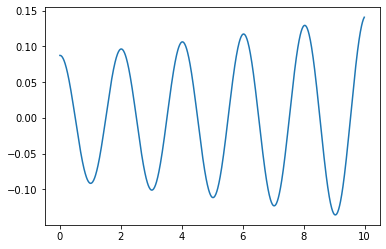

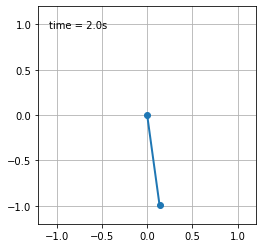

In [31]:
import matplotlib.animation as animation
from IPython.display import HTML

plt.close('all')
l = 1
r = l+0.2
theta0 = 5*np.pi/180
w0 = 0
dt = 0.01
tmax = 10
stride = 5
t, th, w = pendulum_traj(theta0, w0, l, dt, tmax)
x = l*np.sin(th)
y = -l*np.cos(th)
plt.plot(t,th)


fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-r,r ), ylim=(-r, r))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    xi = [0,x[stride*i]]
    yi = [0,y[stride*i]]
    line.set_data(xi, yi)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, int(len(y)/stride)),
                              interval=25, blit=True, init_func=init)

#This may take some time to run in the first instance
html = ani.to_jshtml()
HTML(html)



# Appendix: Numerical solutions of Ordinary differential equations (ODE)

## 1st order ODE
- Consider the following 1st order differential equation.

$$
\frac{dy(t)}{dt}=f(y(t),t) \tag{A1}
$$
- Assume that the initial conditions are $y=y_0$ at time $t=t_0$.
- We need to determine $y(t)$, for any $t \ge t_0$.

## Formal solution

- Integrate Eq.(A1) over time, from $0\rightarrow t$, to obtain the formal solution for $y(t)$

$$
y(t)=y_0+\int_{{{t}_{0}}}^{t}{}\,d{t}'f(y({t}'),{t}') \tag{A2}
$$

## Discretization

- Divide the total time span $t_0\rightarrow t$ into $N$ equally spaced segments, each describing a time increment $\Delta t$.
![](discretize.png) 
$$
t_i\equiv t_0+i\Delta t,\ \ \ \ 
y_i\equiv y(t_i),\ \ \ \ 
f_i\equiv f(t_i,y(t_i))\tag{A3}
$$

# 3.2. Numerical calculation

## Advancing the solution forward a small step $\Delta t$

- Integrate Eq.(A1) over a small time interval, from $t_i \rightarrow t_{i+1}(=t_i+\Delta t)$,

$$
y_{i+1} 
=y_i+\int_{{{t}_{i}}}^{t_{i+1}}{}\,d{t}'\,f(y({t}'),{t}') \hspace{50mm}\tag{A3}
$$
$$
= y_i+\int_{0}^{\Delta t}\,d{\tau}\,f(y({t_i+\tau}),t_i+\tau)\ \ \ \ \ \ \ \ (\tau\equiv t'-t_i)\tag{A4}
$$
$$
= y_i+\int_{0}^{\Delta t}\,d{\tau}\,\left[f_i+\mathcal{O}(\tau)+\mathcal{O}(\tau^2)+\cdots)\right]\hspace{14mm}\tag{A5}
$$
$$
= y_i+\left[\tau\, f_i+\mathcal{O}(\tau^2)+\mathcal{O}(\tau^3)+\cdots)\right]_{0}^{\Delta t} \hspace{23mm}\tag{A6}
$$

$$
= y_i+\Delta t \,f_i+\mathcal{O}(\Delta t^2)+\mathcal{O}(\Delta t^3)+\cdots \hspace{23mm}\tag{A7}
$$

## Euler method

- Difference equation $\rightarrow$ 1st order in $\Delta t$


$$
y_{i+1} 
=y_i+\int_{{{t}_{i}}}^{t_{i+1}}{}\,d{t}'\,f(y({t}'),{t}')
\simeq y_i+\Delta t \,f_i \tag{A8}
$$

- Simulation procedure $\rightarrow$ Explicit method

$$
y_0, f_0 \xrightarrow[\Delta t]{\rm Eq.(A8)}
y_1, f_1 \xrightarrow[\Delta t]{\rm Eq.(A8)}
\cdots
y_i, f_i 
\cdots
\xrightarrow[\Delta t]{\rm Eq.(A8)}\tag{A9}
y_N, f_N 
$$

- Forward difference approximation (1st order)

$$
\left.\frac{dy(t)}{dt}\right|_{t=t_i}\simeq\frac{y_{i+1}-y_i}{\Delta t}\tag{A10}
$$

## Leapfrog method

- Central difference approximation
If we use taylor to do 2 expansion and $t+\Delta t$ and $t - \Delta t$ we get

$$
y(t + \Delta t) \approx y(t) + y'(t)\Delta t + \frac{1}{2} y"(t) \Delta t^2 + \ldots
$$
$$
y(t - \Delta t) \approx y(t) - y'(t)\Delta t + \frac{1}{2} y"(t) \Delta t^2 + \ldots
$$
If we substract these expressions we obtain
$$
y(t + \Delta t) - y(t - \Delta t) \approx 2 * y'(t) \Delta t + O(\Delta t^3)
$$
We can now write the central difference approximation for the derivative

$$
\left.\frac{dy(t)}{dt}\right|_{t=t_i}\simeq\frac{y_{i+1}-y_{i-1}}{2\Delta t}\tag{A11}
$$

- Difference equation, Substitute Eq.(A11) in Eq.(A1)

$$
y_{i+1} 
=y_{i-1}+\int_{{{t}_{i-1}}}^{t_{i+1}}{}\,d{t}'\,f(y({t}'),{t}')
\simeq y_{i-1}+2\Delta t \,f_i \tag{A12}
$$

- Simulation procedure $\rightarrow$ Explicit method

$$
y_{-1}, f_0 \xrightarrow[\ \ \ 2\Delta t\ \ \ ]{\rm Eq.(A11)}
y_1, f_2 \xrightarrow[2\Delta t]{\rm Eq.(A11)}
\cdots
y_i, f_{i+1} 
\cdots
\xrightarrow[2\Delta t]{\rm Eq.(A11)}
y_N  \tag{A13}
$$

$$
y_{0}, f_1 \xrightarrow[2\Delta t]{\rm Eq.(A11)}
y_2, f_3 \cdots
\xrightarrow[2\Delta t]{\rm Eq.(A11)}
y_{N-1}, f_{N} \tag{A14}
$$

## Runge-Kutta (2nd)

- Difference equation

$$
y_{i+1} 
=y_i+\int_{{{t}_{i}}}^{t_{i+1}}{}\,d{t}'\,f(y({t}'),{t}')
\simeq y_i+\Delta t \,f\,'_{i+\frac{1}{2}} \hspace{15mm}{\rm (Leapfrog)}\tag{A15}
$$
$\hspace{60mm}$with
$$
y\,'_{i+\frac{1}{2}} = y_i+\frac{1}{2}\Delta t \,f_i , \hspace{10mm}
f\,'_{i+\frac{1}{2}}=f(y\,'_{i+\frac{1}{2}},t_{i+\frac{1}{2}}) \hspace{20mm}{\rm (Euler)}\tag{A16}
$$


- Simulation procedure $\rightarrow$ Explicit method

$$
y_{0}, f_{0} \xrightarrow[\ \ \ \frac{1}{2}\Delta t\ \ \ ]{\rm Eq.(A16)}
y\,'_{\frac{1}{2}}, f\,'_{\frac{1}{2}}
\hspace{15mm}
y_i, f_{i} 
\xrightarrow[\frac{1}{2}\Delta t]{\rm Eq.(A16)}
y\,'_{i+\frac{1}{2}}, f\,'_{i+\frac{1}{2}} 
\hspace{60mm} 
$$
$$
y_{1}, f_{1} \xrightarrow[\ \ \ \frac{1}{2}\Delta t\ \ \ ]{\rm Eq.(A16)}
y\,'_{1+\frac{1}{2}}, f\,'_{1+\frac{1}{2}} 
\hspace{8mm} \cdots
\xrightarrow[\frac{1}{2}\Delta t]{\rm Eq.(A16)}
y\,'_{N-\frac{1}{2}}, f\,'_{N-\frac{1}{2}} \hspace{20mm}\ 
$$

$$
y_{0}, f\,'_{\frac{1}{2}} \xrightarrow[\ \ \ \Delta t\ \ \ ]{\rm Eq.(A15)}
y_1, f\,'_{1+\frac{1}{2}} \xrightarrow[\Delta t]{\rm Eq.(A15)}
\cdots
y_i, f\,'_{i+\frac{1}{2}} 
\cdots
\xrightarrow[\Delta t]{\rm Eq.(A15)}
y_N  \tag{A17}
$$

## Runge-Kutta (4th)

- Difference equation

$$
y_{i+1} 
=y_i+\int_{{{t}_{i}}}^{t_{i+1}}{}\,d{t}'\,f(y({t}'),{t}')
$$
$$
\hspace{35mm}\simeq y_i+\frac{1}{6}\Delta t \left[
f_i+2f\,'_{i+\frac{1}{2}}+2f\,''_{i+\frac{1}{2}}+f\,'''_{i+1}
\right]\tag{A18}
$$
$\hspace{40mm}$with

$$
y\,'_{i+\frac{1}{2}}=y_i+\frac{\Delta t}{2}f_i,\hspace{20mm}
f\,'_{i+\frac{1}{2}}= f(y\,'_{i+\frac{1}{2}},t_{i+\frac{1}{2}}) \tag{A19}
$$

$$
y\,''_{i+\frac{1}{2}}=y_i+\frac{\Delta t}{2}f\,'_{i+\frac{1}{2}},\hspace{20mm}
f\,''_{i+\frac{1}{2}}= f(y\,''_{i+\frac{1}{2}},t_{i+\frac{1}{2}}) \tag{A20}
$$

$$
y\,'''_{i+1}=y_i+{\Delta t}f\,''_{i+\frac{1}{2}},\hspace{20mm}
f\,'''_{i+1} = f(y\,'''_{i+1},t_{i+1}) \tag{A21}
$$
